In [ ]:
import pandas as pd
import networkx as nx
from matplotlib.pyplot import figure
import numpy as np


In [ ]:
dis = pd.read_csv("disease_interactome.csv")
dis = dis[['OFFICIAL_SYMBOL_A','OFFICIAL_SYMBOL_B']]
dis

,OFFICIAL_SYMBOL_A,OFFICIAL_SYMBOL_B
0,A2M,APOE
1,A2M,LEP
2,A2M,NGF
3,ABAT,ACP6
4,ABAT,ADSL
...,...,...
6138,ZNF746,IDH2
6139,ZNF76,LETM1
6140,ZNF836,TBCD
6141,ZSCAN29,ABAT


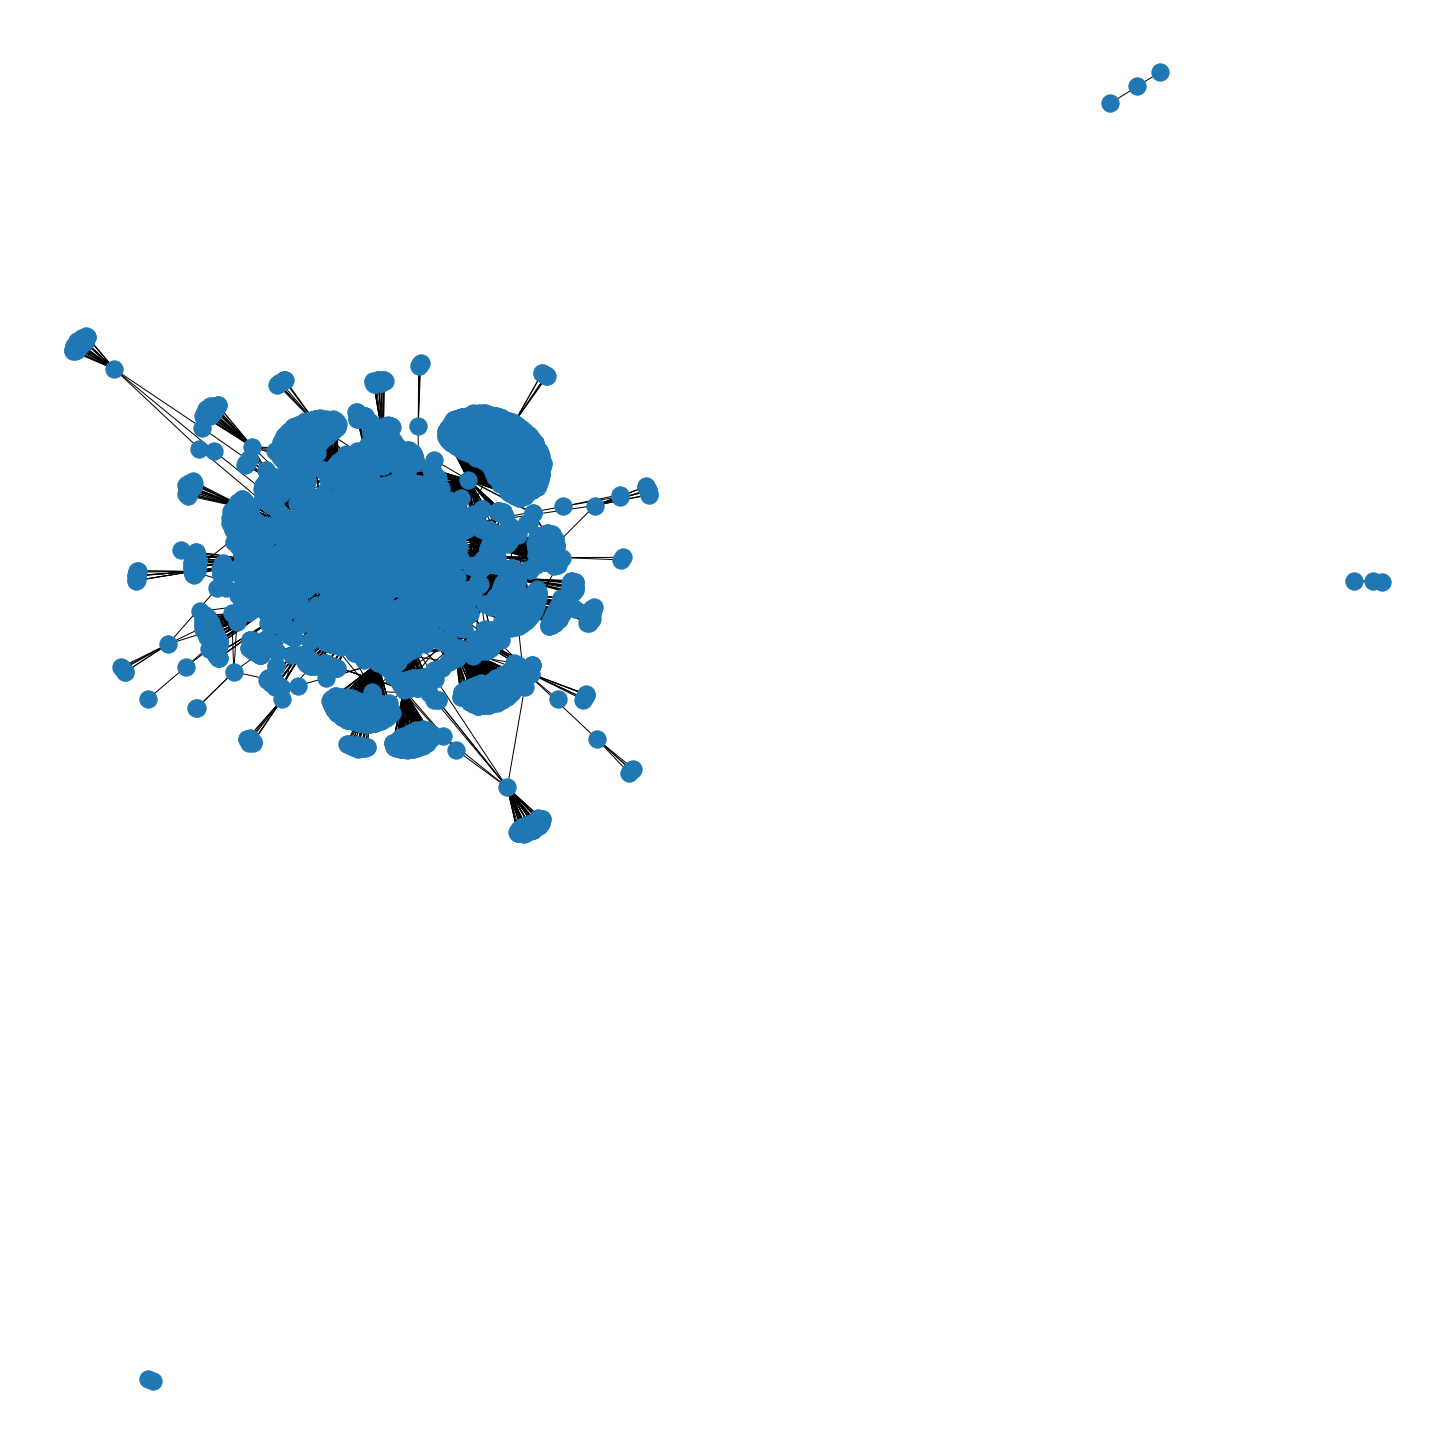

In [ ]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(dis, 'OFFICIAL_SYMBOL_A',	'OFFICIAL_SYMBOL_B', create_using=Graphtype)

figure(figsize=(20, 20))
nx.draw(G, with_labels=False)

In [ ]:
#No. of nodes and no. of links
print("Number of nodes: ",len(G.nodes))
print("Number of links: ",len(G.edges))

Number of nodes:  4160
Number of links:  5767


In [ ]:
# No. of connected components
nx.number_connected_components(G)

4

In [ ]:
# No. of isolated nodes
len(list(nx.isolates(G)))

0

In [ ]:
# Average degree
deg=[]
for el in G.degree:
  deg.append(el[1])
print("Average degree: ",round(sum(deg)/len(deg),3))

Average degree:  2.773


In [ ]:
# Average clustering coefficient

nx.average_clustering(G)


0.0

In [ ]:
 # Network diameter & radius

main_G = G.copy() # Network of the biggest connected component considering the whole graph
main_g = list(nx.connected_components(G))[0]

for i in range(1,4):
  for el in list(nx.connected_components(G))[i]:
    main_G.remove_node(el)

print("The diameter of the main connected component is",nx.algorithms.distance_measures.diameter(main_G))
print("The radius of the main connected component is",nx.algorithms.distance_measures.radius(main_G))

The diameter of the main connected component is 10
The radius of the main connected component is 5


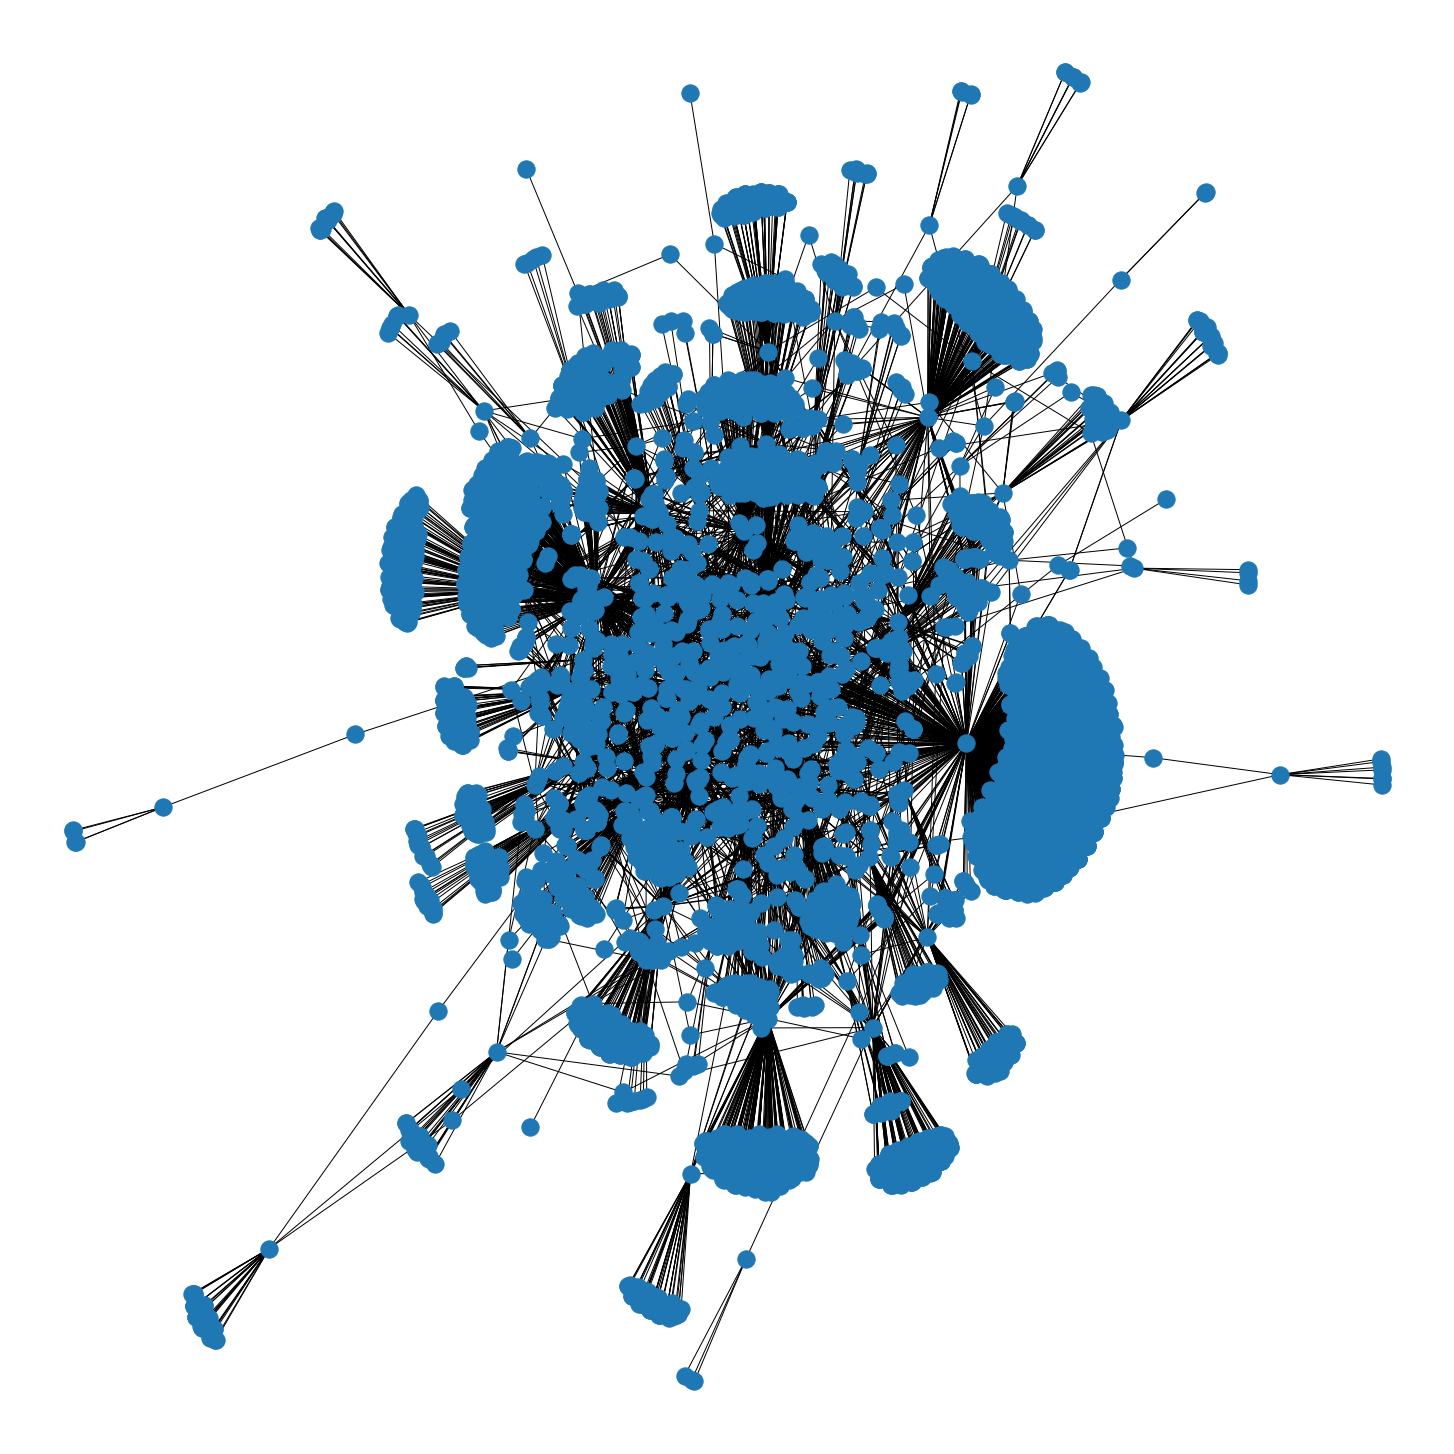

In [ ]:
figure(figsize=(20, 20))
nx.draw(main_G, with_labels=False)

In [ ]:
# Average path length
print("The average of the shortest path lenght in the main connected component is",round(nx.average_shortest_path_length(main_G),3))


The average of the shortest path lenght in the main connected component is 4.061


In [ ]:
# Centralization